In [89]:
#https://github.com/arvin2911/EE399/tree/HW3

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# Load the MNIST data
mnist = fetch_openml('mnist_784')

In [3]:

# Get the pixel values for all images in the dataset
X = mnist.data.astype('float32')
X /= 255.0
y = mnist.target.astype('int32')

In [4]:
#1
# Reshape the images into column vectors and store them as columns in a data matrix
X_col = X.T

# Print the shape of the column vector matrix
print(X_col.shape)


#perform SVD
U, s, Vt = np.linalg.svd(X_col, full_matrices=False)

(784, 70000)


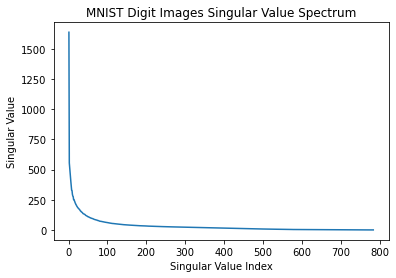

In [5]:
#2
plt.plot(np.arange(1, len(s)+1), s)
plt.title('MNIST Digit Images Singular Value Spectrum')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.show()


# 3
In singular value decomposition (SVD), a matrix `X` can be decomposed into the product of three matrices: `U`, `Σ`, and `V^T`, where `U` and `V` are orthogonal matrices and `Σ` is a diagonal matrix. 

The matrix `U` contains the left singular vectors of `X`, which correspond to the directions of maximum variance in the row space of `X`. Each column of `U` is a unit vector that points in the direction of maximum variance, and the magnitude of each entry in the column represents the contribution of the corresponding variable to that direction. Thus, the columns of `U` provide a set of orthonormal basis vectors that span the row space of `X`.

The matrix `V^T` contains the right singular vectors of `X`, which correspond to the directions of maximum variance in the column space of `X`. Each row of `V^T` is a unit vector that points in the direction of maximum variance, and the magnitude of each entry in the row represents the contribution of the corresponding observation to that direction. Thus, the rows of `V^T` provide a set of orthonormal basis vectors that span the column space of `X`.

The matrix `Σ` contains the singular values of `X`, which represent the amount of variance captured by each singular vector. The singular values are arranged in descending order on the diagonal of `Σ`, so the first singular value represents the direction of maximum variance in the row space of `X`, the second singular value represents the direction of maximum variance orthogonal to the first singular vector, and so on. The diagonal entries of `Σ` are always non-negative, and they decrease in magnitude as you move down the diagonal.

Together, the matrices `U`, `Σ`, and `V^T` can be used to reconstruct the original matrix `X`. Specifically, you can reconstruct `X` by multiplying `U`, `Σ`, and `V^T` together, but only using the top `k` singular values and their corresponding singular vectors. This means that you can approximate `X` by a low-rank matrix that captures the most important information in the data, and discard the information that contributes less to the overall variability. The rank `k` of the approximation is typically determined by the number of singular values that explain a significant portion of the total variance in the data, as determined by the singular value spectrum.

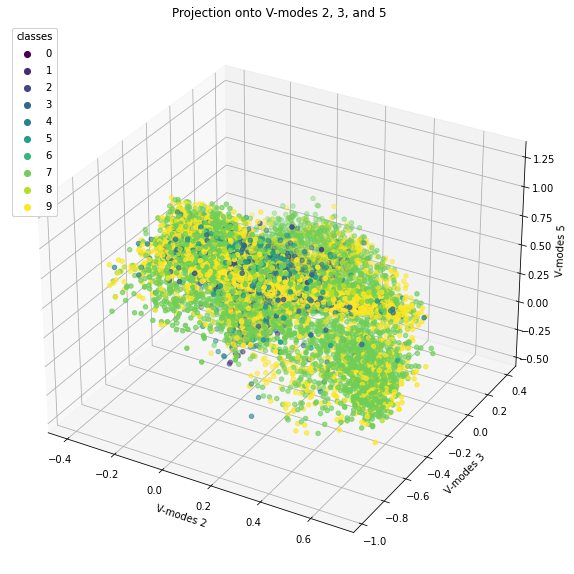

In [7]:
#4
# Select the columns of V to use for projection
V_proj = Vt[:, [2, 3, 5]]
# Project the data onto the selected V-modes
X_proj = np.dot(X_col.T, V_proj)


# Create a 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D
scatter = ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], c = y.astype(int))
legend = ax.legend(*scatter.legend_elements(), title='classes', loc='upper left')
ax.add_artist(legend)
# Add labels to the axes
plt.title('Projection onto V-modes 2, 3, and 5')
ax.set_xlabel('V-modes 2')
ax.set_ylabel('V-modes 3')
ax.set_zlabel('V-modes 5')

# Show the plot
plt.show()

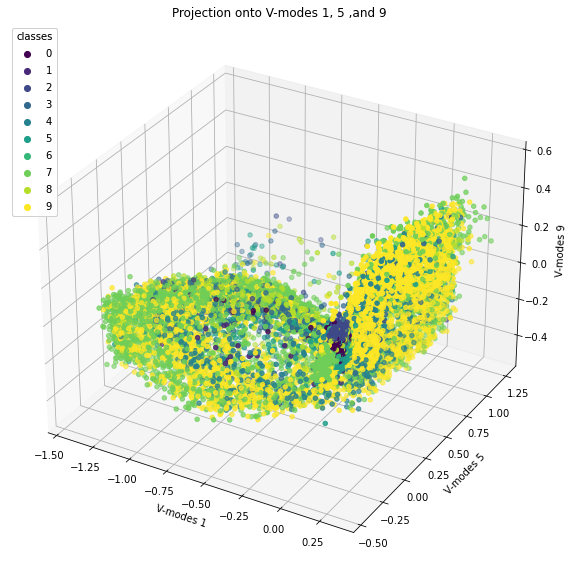

In [88]:
# Select the columns of V to use for projection
V_proj = Vt[:, [1, 5, 9]]
# Project the data onto the selected V-modes
X_proj = np.dot(X_col.T, V_proj)


# Create a 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D
scatter = ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], c = y.astype(int))
legend = ax.legend(*scatter.legend_elements(), title='classes', loc='upper left')
ax.add_artist(legend)
# Add labels to the axes
plt.title('Projection onto V-modes 1, 5 ,and 9')
ax.set_xlabel('V-modes 1')
ax.set_ylabel('V-modes 5')
ax.set_zlabel('V-modes 9')

# Show the plot
plt.show()

In [8]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X)

In [9]:
#pick digit 0 and 1
label_0 = 0
label_1 = 1

X_0 = X_train_pca[y == label_0]  
X_1 = X_train_pca[y == label_1]
y_0 = y[y == label_0] 
y_1 = y[y == label_1]


In [92]:
# Split the digit 0 into training and testing sets
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_0, y_0, test_size=0.2, random_state=42)

# Split the digit 1 into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [93]:
X_train = np.vstack([X_train0, X_train1])
y_train = np.hstack([y_train0, y_train1])

In [96]:
# Train the LDA model on the training data
lda = LDA()
lda.fit(X_train, y_train)

# Predict the labels for the test data
y_pred0 = lda.predict(X_test0)
y_pred1 = lda.predict(X_test1)


# Compute the accuracy of the classifier on the test set
acc_0 = np.mean(y_pred0 == 0)
acc_1 = np.mean(y_pred1 == 1)
acc = (acc_0 + acc_1) / 2

print(f"Accuracy on digit {label_0}: {acc_0:.3f}")
print(f"Accuracy on digit {label_1}: {acc_1:.3f}")
print(f"Overall accuracy: {acc:.3f}")

Accuracy on digit 0: 0.993
Accuracy on digit 1: 1.000
Overall accuracy: 0.996


In [13]:
#pick digit 2
label_2 = 2
X_2 = X_train_pca[y == label_2]
y_2 = y[y == label_2] 

# Split the digit 2 into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

X_train012 = np.vstack([X_train0, X_train1, X_train2])
y_train012 = np.hstack([y_train0, y_train1, y_train2])

# Train the LDA model on the training data
lda = LDA()
lda.fit(X_train012, y_train012)

# Predict the labels for the test data
y_pred0 = lda.predict(X_test0)
y_pred1 = lda.predict(X_test1)
y_pred2 = lda.predict(X_test2)

# Compute the accuracy of the classifier on the test set
acc_0 = np.mean(y_pred0 == label_0)
acc_1 = np.mean(y_pred1 == label_1)
acc_2 = np.mean(y_pred2 == label_2)
acc = (acc_0 + acc_1 + acc_2) / 3

print(f"Accuracy on digit {label_0}: {acc_0:.3f}")
print(f"Accuracy on digit {label_1}: {acc_1:.3f}")
print(f"Accuracy on digit {label_2}: {acc_2:.3f}")
print(f"Overall accuracy: {acc:.3f}")

Accuracy on digit 0: 0.965
Accuracy on digit 1: 0.985
Accuracy on digit 2: 0.902
Overall accuracy: 0.950


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y, test_size=0.2, random_state=42)

In [103]:
# Train an SVM classifier on the training set
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8382142857142857


In [102]:
# Train an LDA classifier on the training set
clf = LDA()
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7698571428571429


In [101]:
# Train a DECISION TREE classifier on the training set
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7956428571428571


In [48]:
from itertools import combinations

# FIND THE HARDEST AND EASIEST PAIR OF DIGITS TO SEPARATE USING LDA

# Train a binary classifier for each pair of digits
accuracy_scores_LDA = {}
digit_pairs = list(combinations(range(10), 2))

for pair in digit_pairs:
    X_pair = X_train_pca[(y == (pair[0])) | (y == (pair[1]))]
    y_pair = y[(y == (pair[0])) | (y == (pair[1]))]
    
    # Split the whole dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y_pair, test_size=0.2, random_state=42)
    
    clf = LDA()
    clf.fit(X_train, y_train)
    y_pair_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pair_pred)
    accuracy_scores_LDA[pair] = accuracy

# Print the hardest and easiest pairs of digits to separate
hardest_pair = min(accuracy_scores_LDA, key=accuracy_scores.get)
easiest_pair = max(accuracy_scores_LDA, key=accuracy_scores.get)
print('Hardest pair:', hardest_pair, 'Accuracy:', accuracy_scores_LDA[hardest_pair])
print('Easiest pair:', easiest_pair, 'Accuracy:', accuracy_scores_LDA[easiest_pair])

Hardest pair: (4, 9) Accuracy: 0.8382299601015597
Easiest pair: (0, 1) Accuracy: 0.9969553450608931


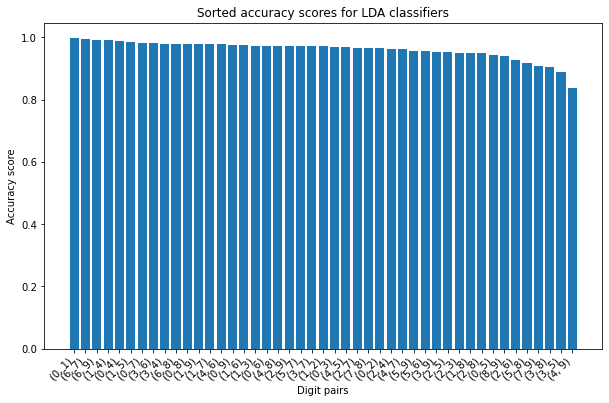

In [49]:
# Sort the accuracy scores dictionary by value
sorted_accuracy_scores = dict(sorted(accuracy_scores_LDA.items(), key=lambda x: -x[1]))

# Create a bar chart of the sorted accuracy scores
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(sorted_accuracy_scores)), list(sorted_accuracy_scores.values()))
ax.set_xticks(range(len(sorted_accuracy_scores)))
ax.set_xticklabels([str(pair) for pair in sorted_accuracy_scores.keys()], rotation=45, ha='right')
ax.set_xlabel('Digit pairs')
ax.set_ylabel('Accuracy score')
ax.set_title('Sorted accuracy scores for LDA classifiers')
plt.show()

In [50]:
from itertools import combinations

# FIND THE HARDEST AND EASIEST PAIR OF DIGITS TO SEPARATE USING SVM

# Train a binary classifier for each pair of digits
accuracy_scores_SVM = {}
digit_pairs = list(combinations(range(10), 2))

for pair in digit_pairs:
    X_pair = X_train_pca[(y == (pair[0])) | (y == (pair[1]))]
    y_pair = y[(y == (pair[0])) | (y == (pair[1]))]
    
    # Split the whole dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y_pair, test_size=0.2, random_state=42)
    
    clf = svm.SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_pair_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pair_pred)
    accuracy_scores_SVM[pair] = accuracy

# Print the hardest and easiest pairs of digits to separate
hardest_pair = min(accuracy_scores_SVM, key=accuracy_scores.get)
easiest_pair = max(accuracy_scores_SVM, key=accuracy_scores.get)
print('Hardest pair:', hardest_pair, 'Accuracy:', accuracy_scores_SVM[hardest_pair])
print('Easiest pair:', easiest_pair, 'Accuracy:', accuracy_scores_SVM[easiest_pair])

Hardest pair: (4, 9) Accuracy: 0.8378672470076169
Easiest pair: (0, 1) Accuracy: 0.9989851150202977


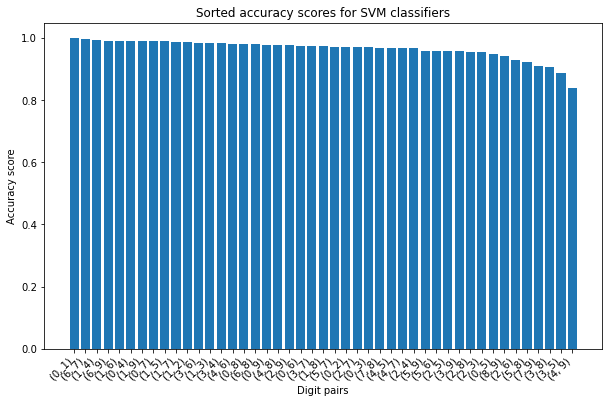

In [51]:
# Sort the accuracy scores dictionary by value
sorted_accuracy_scores = dict(sorted(accuracy_scores_SVM.items(), key=lambda x: -x[1]))

# Create a bar chart of the sorted accuracy scores
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(sorted_accuracy_scores)), list(sorted_accuracy_scores.values()))
ax.set_xticks(range(len(sorted_accuracy_scores)))
ax.set_xticklabels([str(pair) for pair in sorted_accuracy_scores.keys()], rotation=45, ha='right')
ax.set_xlabel('Digit pairs')
ax.set_ylabel('Accuracy score')
ax.set_title('Sorted accuracy scores for SVM classifiers')
plt.show()

In [52]:
from itertools import combinations

# FIND THE HARDEST AND EASIEST PAIR OF DIGITS TO SEPARATE USING decision tree

# Train a binary classifier for each pair of digits
accuracy_scores_DT = {}
digit_pairs = list(combinations(range(10), 2))

for pair in digit_pairs:
    X_pair = X_train_pca[(y == (pair[0])) | (y == (pair[1]))]
    y_pair = y[(y == (pair[0])) | (y == (pair[1]))]
    
    # Split the whole dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y_pair, test_size=0.2, random_state=42)
    
    clf = DecisionTreeClassifier(max_depth=10)
    clf.fit(X_train, y_train)
    y_pair_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pair_pred)
    accuracy_scores_DT[pair] = accuracy

# Print the hardest and easiest pairs of digits to separate
hardest_pair = min(accuracy_scores_DT, key=accuracy_scores.get)
easiest_pair = max(accuracy_scores_DT, key=accuracy_scores.get)
print('Hardest pair:', hardest_pair, 'Accuracy:', accuracy_scores_DT[hardest_pair])
print('Easiest pair:', easiest_pair, 'Accuracy:', accuracy_scores_DT[easiest_pair])

Hardest pair: (4, 9) Accuracy: 0.857816467174465
Easiest pair: (0, 1) Accuracy: 0.9972936400541272


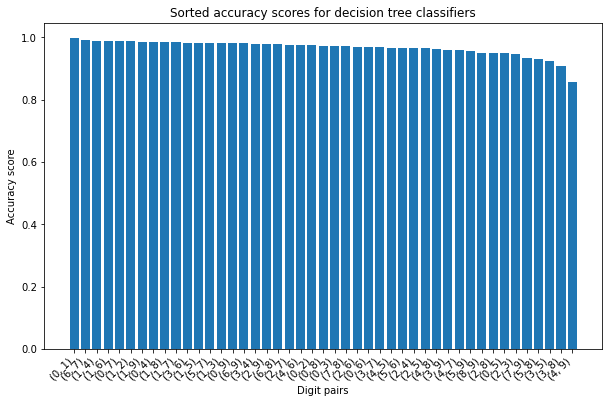

In [53]:
# Sort the accuracy scores dictionary by value
sorted_accuracy_scores = dict(sorted(accuracy_scores_DT.items(), key=lambda x: -x[1]))

# Create a bar chart of the sorted accuracy scores
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(sorted_accuracy_scores)), list(sorted_accuracy_scores.values()))
ax.set_xticks(range(len(sorted_accuracy_scores)))
ax.set_xticklabels([str(pair) for pair in sorted_accuracy_scores.keys()], rotation=45, ha='right')
ax.set_xlabel('Digit pairs')
ax.set_ylabel('Accuracy score')
ax.set_title('Sorted accuracy scores for decision tree classifiers')
plt.show()